# Importation des données

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tab_final = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/tab_final.csv", ";")
tab_final

,nom,% Voix/Ins_T2,% Voix/Exp_T2,% Voix/Exp_T1,% Voix/Ins_T1,P13_pop,P13_pop0002,P13_pop0305,P13_pop0610,P13_pop1117,P13_pop1824,P13_pop2539,P13_pop4054,P13_pop5564,P13_pop6579,P13_pop80p,P13_pop0019,P13_pop2064,P13_pop65P,P13_poph,P13_h0019,P13_h2064,P13_h65p,P13_popf,P13_f0019,P13_f2064,P13_f65p,P13_pop_fr,P13_pop_etr,P13_Pop15P,C13_Pop15P_cs1,C13_Pop15P_cs2,C13_Pop15P_cs3,C13_Pop15P_cs4,C13_Pop15P_cs5,C13_Pop15P_cs6,C13_Pop15P_cs7,C13_Pop15P_cs8,C13_H15P,C13_H15P_cs1,C13_H15P_cs2,C13_H15P_cs3,C13_H15P_cs4,C13_H15P_cs5,C13_H15P_cs6,C13_H15P_cs7,C13_H15P_cs8,C13_F15P,C13_F15P_cs1,C13_F15P_cs2,C13_F15P_cs3,C13_F15P_cs4,C13_F15P_cs5,C13_F15P_cs6,C13_F15P_cs7,C13_F15P_cs8,sexe,nb_mandats,ancrage_local,Tweets,Followers,Following,Listed,Replies/100derniers,Tweets with @mentions/100derniers,Tweets with #hashtags/100derniers,Retweets/100,Tweets with links/100derniers,Tweets with media/100derniers,age,duree_mandat (sem),semaines_presence/duree_mandat (sem),amendements_adoptes/duree_mandat (sem),amendements_proposes/duree_mandat (sem),amendements_signes/duree_mandat (sem),commission_interventions/duree_mandat (sem),commission_presences/duree_mandat (sem),hemicycle_interventions/duree_mandat (sem),hemicycle_interventions_courtes/duree_mandat (sem),propositions_ecrites/duree_mandat (sem),propositions_signees/duree_mandat (sem),questions_ecrites/duree_mandat (sem),questions_orales/duree_mandat (sem),rapports/duree_mandat (sem),_Agriculteurs exploitants,_Anciens agriculteurs exploitants,"_Anciens artisans, commerçants, chefs d'entreprise",_Anciens cadres et professions intermédiaires,_Anciens employés et ouvriers,_Artisans,_Cadres d'entreprise,"_Cadres de la fonction publique, professions intellectuelles et artistiques",_Chefs d'entreprise de 10 salariés ou plus,_Commerçants et assimilés,"_Contremaîtres, agents de maîtrise",_Employés administratifs d'entreprise,_Employés de commerce,_Employés de la fonction publique,_Inactifs divers (autres que retraités),_Ouvriers agricoles,_Ouvriers qualifiés,_Professions intermédiaires administratives et commerciales des entreprises,"_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés",_Professions libérales et assimilés,_Sans profession déclarée,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI
0,Xavier Breton,21.25,53.75,26.78,12.93,115682.800721,2.484397,3.828599,6.533428,9.086115,7.324389,17.261977,20.751716,12.875815,13.033143,6.817828,24.239726,55.907574,19.851835,56844.500948,25.325452,57.283091,17.389698,58838.299773,23.190795,54.576974,22.230531,96.573365,3.425771,94716.998481,1.046286,3.362684,6.059166,14.981629,16.054310,15.812534,29.081676,13.599603,45940.325115,1.728341,5.032651,7.448846,14.749673,6.636918,26.269047,26.830649,11.295168,48776.673366,0.401837,1.787764,4.748237,15.200098,24.924143,5.961948,31.199770,15.768001,1,1,0,4996.0,9291.0,1359.0,275.0,5.0,84.0,30.0,68.0,26.0,8.0,60,236.857143,0.709288,0.743064,14.713510,34.712907,2.098311,1.541013,3.795537,3.318456,0.037998,0.696622,0.519300,0.059107,0.012666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Olga Givernet,21.91,61.86,45.30,20.37,131843.000000,2.904212,4.470469,7.318553,9.396024,6.206625,21.676540,22.775574,11.047230,10.029353,4.170870,26.178864,59.619396,14.200981,64866.149236,26.989486,60.190238,12.817192,66976.850764,25.392678,59.065934,15.539895,79.467245,20.531996,105437.695122,0.347127,3.364094,13.006819,16.488519,18.123619,12.758330,19.767254,16.140444,51205.847307,0.574163,4.884289,17.836149,15.728933,9.708036,21.396348,18.488429,11.375842,54231.847815,0.132765,1.928786,8.445354,17.204182,26.068116,4.600690,20.973244,20.639487,0,1,0,3636.0,5950.0,2850.0,138.0,1.0,85.0,40.0,37.0,61.0,7.0,41,236.857143,0.629071,4.019300,0.308203,6.936671,0.375754,0.806393,0.189988,0.025332,0.004222,0.189988,0.084439,0.025332,0.012666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Stéphane Trompille,25.21,64.50,36.00,17.33,126379.199279,2.446609,3.752997,6.8

# Création des barplots

In [29]:
tab_final.columns.to_list()

['nom',
 '% Voix/Ins_T2',
 '% Voix/Exp_T2',
 '% Voix/Exp_T1',
 '% Voix/Ins_T1',
 'P13_pop',
 'P13_pop0002',
 'P13_pop0305',
 'P13_pop0610',
 'P13_pop1117',
 'P13_pop1824',
 'P13_pop2539',
 'P13_pop4054',
 'P13_pop5564',
 'P13_pop6579',
 'P13_pop80p',
 'P13_pop0019',
 'P13_pop2064',
 'P13_pop65P',
 'P13_poph',
 'P13_h0019',
 'P13_h2064',
 'P13_h65p',
 'P13_popf',
 'P13_f0019',
 'P13_f2064',
 'P13_f65p',
 'P13_pop_fr',
 'P13_pop_etr',
 'P13_Pop15P',
 'C13_Pop15P_cs1',
 'C13_Pop15P_cs2',
 'C13_Pop15P_cs3',
 'C13_Pop15P_cs4',
 'C13_Pop15P_cs5',
 'C13_Pop15P_cs6',
 'C13_Pop15P_cs7',
 'C13_Pop15P_cs8',
 'C13_H15P',
 'C13_H15P_cs1',
 'C13_H15P_cs2',
 'C13_H15P_cs3',
 'C13_H15P_cs4',
 'C13_H15P_cs5',
 'C13_H15P_cs6',
 'C13_H15P_cs7',
 'C13_H15P_cs8',
 'C13_F15P',
 'C13_F15P_cs1',
 'C13_F15P_cs2',
 'C13_F15P_cs3',
 'C13_F15P_cs4',
 'C13_F15P_cs5',
 'C13_F15P_cs6',
 'C13_F15P_cs7',
 'C13_F15P_cs8',
 'sexe',
 'nb_mandats',
 'ancrage_local',
 'Tweets',
 'Followers',
 'Following',
 'Listed',
 'Repl

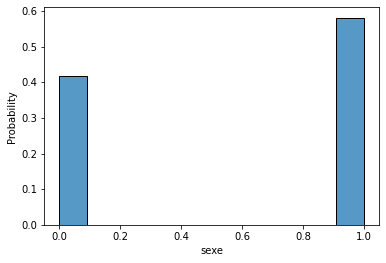

In [78]:
sexe_depute = sns.histplot(data = tab_final, x = "sexe", stat= "probability")

In [79]:
sexe_depute = sns.barplot(data = tab_final, x = "sexe")

ValueError: Could not interpret input 'probability'

0      1
1      0
2      1
3      1
4      0
      ..
518    1
519    1
520    1
521    0
522    1
Name: sexe, Length: 523, dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape

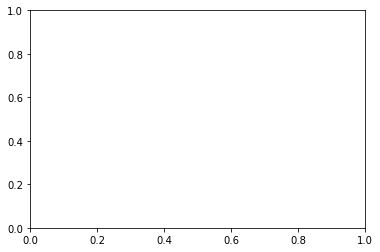

In [61]:
sexe = tab_final['sexe']
sum
x = [0,1]
tot = sum(sexe)
sexe=sexe/tot
width = 0.8 
fig, ax = plt.subplots()
rects1 = ax.bar(x, sexe, width, color='b')
ax.set_ylim(0,0.3)
ax.set_ylabel('Proportions')
ax.set_title('Sexe des député.es')
ax.set_xticks(np.add(x,(width/2))) # set the position of the x ticks
plt.show()

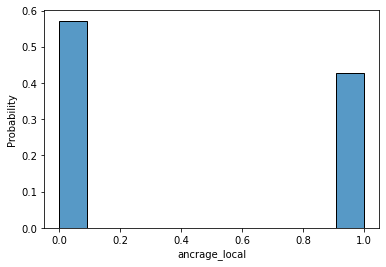

In [36]:
ancrage_local_depute = sns.histplot(data = tab_final, x = "ancrage_local", stat='probability')

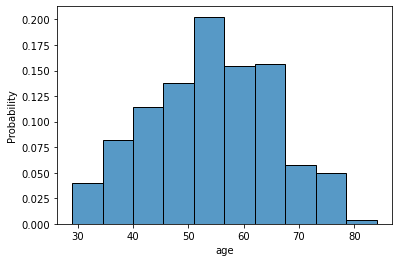

In [39]:
age_depute = sns.histplot(data = tab_final, x = "age", stat='probability', bins = 10 )

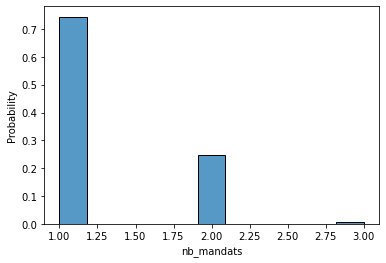

In [38]:
nb_mandats_depute = sns.histplot(data = tab_final, x = 'nb_mandats', stat='probability')

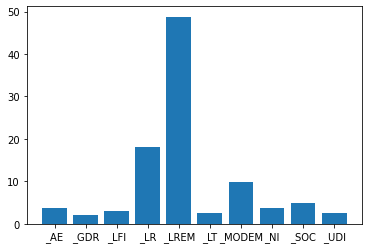

In [53]:
names = [ '_AE', '_GDR', '_LFI', '_LR', '_LREM', '_LT', '_MODEM', '_NI', '_SOC', '_UDI']
values=[]  
for i in names : 
    values.append(tab_final[i].sum()/523*100)
sum(values) #test
plt.bar(names, values)
plt.show()

In [85]:
names = ['_Agriculteurs exploitants', '_Anciens agriculteurs exploitants', "_Anciens artisans, commerçants, chefs d'entreprise", '_Anciens cadres et professions intermédiaires', '_Anciens employés et ouvriers',
 '_Artisans', "_Cadres d'entreprise", '_Cadres de la fonction publique, professions intellectuelles et  artistiques',
 "_Chefs d'entreprise de 10 salariés ou plus", '_Commerçants et assimilés', '_Contremaîtres, agents de maîtrise', "_Employés administratifs d'entreprise", '_Employés de commerce', 
 '_Employés de la fonction publique', '_Inactifs divers (autres que retraités)', '_Ouvriers agricoles',
 '_Ouvriers qualifiés', '_Professions intermédiaires administratives et commerciales des entreprises', "_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés", '_Professions libérales et assimilés',
 '_Sans profession déclarée']
values=[]  
for i in names : 
    values.append(tab_final[i].sum())
sum(values) #test il manque 6 personnes on n'a que 517 résultats 

tab_final['_Sans profession déclarée'] == 1 if tab_final[names].sum(axis=1) = 0


SyntaxError: invalid syntax (<ipython-input-85-3d3b74f57707>, line 12)

98.85277246653925

# Création des pairplots et heatmap

In [ ]:
essai = basevraimenfinale.iloc[:,[0,2]])

= sns.heatmap(basevraimentfinale, )